#### Ezinne Okechukwu | Data Analyst | adahacos@gmail.com

## Quantium Job Simulation || Forage Virtual Internship

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('QVI_data.csv')
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget


### Data Inspection and Preparation

In [3]:
# check columns
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [4]:
# drop columns not needed for the task
df.drop(columns = ['PROD_NBR', 'PROD_NAME', 'PACK_SIZE', 'BRAND', 'LIFESTAGE','PREMIUM_CUSTOMER'], inplace = True)
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES
0,1000,2018-10-17,1,1,2,6.0
1,1002,2018-09-16,1,2,1,2.7
2,1003,2019-03-07,1,3,1,3.6


### Before Trial: Finding Control Stores for each Trial Store

Trial began in February, 2019 and lasted till April, 2019. <br />
To get control store for each trial store, get the store with highest pearson correlation monthly sales with each trial store.

In [5]:
# create a new table before_trial for transaction before trial period
df['DATE'] = pd.to_datetime(df['DATE'])
# create a month column
df['MONTH'] = df['DATE'].dt.to_period('M')
# filter out transaction before trial began
start_date = '02-01-2019' #MM-DD-YYYY format
end_date = '04-30-2019'
before_trial = df[(df['DATE'] < start_date)]
before_trial['MONTH'].sort_values().unique()

<PeriodArray>
['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01']
Length: 7, dtype: period[M]

In [6]:
# find the total sales of store by month
sales_before_trial = before_trial.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum().reset_index()
sales_before_trial.head(3)

,STORE_NBR,MONTH,TOT_SALES
0,1,2018-07,206.9
1,1,2018-08,176.1
2,1,2018-09,278.8


In [7]:
# create a pivot_table
sales_pivot = sales_before_trial.pivot(index='MONTH', columns = 'STORE_NBR', values = 'TOT_SALES')
sales_pivot.head(3)

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
MONTH,,,,,,,,,,,,,,,,,,,,,
2018-07,206.9,150.8,1205.70,1399.9,812.0,260.0,1024.7,381.6,289.7,892.00,...,38.7,232.6,247.8,127.3,6.2,224.00,982.0,962.80,956.6,433.10
2018-08,176.1,193.8,1079.75,1259.5,745.1,203.2,1119.9,383.0,327.5,878.65,...,28.0,203.3,227.1,154.5,24.9,322.65,835.1,1003.75,683.9,372.85
2018-09,278.8,154.4,1021.50,1198.6,896.0,207.7,1147.3,293.0,369.7,945.00,...,21.8,199.5,133.5,139.0,23.3,174.40,886.0,845.40,798.4,304.70


In [8]:
# create a correlation matrix
corr_matrix = sales_pivot.corr()
corr_matrix.head(3)

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.308766,-0.118761,-0.513184,0.536952,0.017214,0.523967,-0.848134,-0.126882,0.713433,...,-0.053964,-0.234343,-0.384712,-0.420065,-0.216874,-0.264833,-0.270635,-0.637749,0.076379,-0.747844
2,-0.308766,1.000000,-0.327268,0.128407,-0.777867,-0.028429,0.618060,0.299761,-0.218511,-0.619979,...,0.046987,-0.597502,0.101907,0.258521,0.328796,0.696589,-0.283260,-0.055504,-0.598293,-0.098484
3,-0.118761,-0.327268,1.000000,0.227754,0.041518,0.057964,-0.445417,0.132508,-0.695597,-0.065608,...,0.643292,0.558931,0.305765,-0.405014,-0.745096,0.149495,-0.007666,0.330165,0.394708,0.497761


In [30]:
# create a function to find the highest correlated stores to the trial stores
def find_highest_corr(trial_store):
    correlations = corr_matrix[trial_store].drop([trial_store, 31, 11, 159, 204])
    # store 204, 159, 31 and 11 are highly correlated some trials but do not have enough data, so drop
    highest_corr_store = correlations.idxmax()
    highest_corr_value = correlations.max()
    return highest_corr_store, highest_corr_value


#### Control Store for Trial Store 77

In [10]:
find_highest_corr(77)

(np.int64(71), np.float64(0.9141059654434726))

#### Control Store for Trial Store 86

In [11]:
find_highest_corr(86)

(np.int64(155), np.float64(0.8778816901365499))

#### Control Store for Trial Store 88

In [31]:
find_highest_corr(88)

(np.int64(134), np.float64(0.8642934799118704))

### Before Trial: Visualize Monthy Sales of Trial and Control Stores

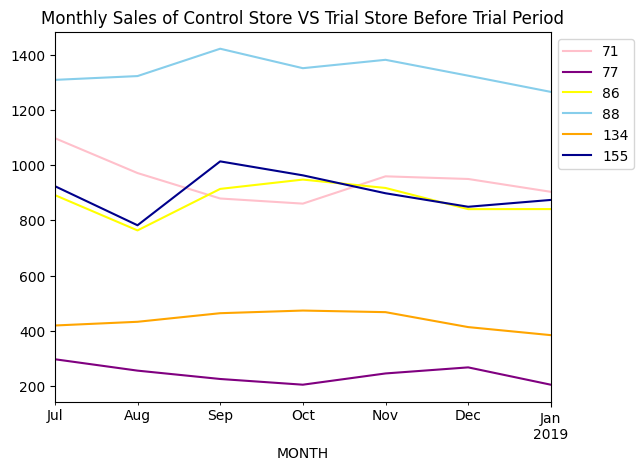

In [33]:
visual_corr = sales_before_trial[sales_before_trial['STORE_NBR'].isin([71,77, 86, 155, 88, 134])].reset_index(drop = True)
visual_corr = visual_corr.pivot(index='MONTH', columns = 'STORE_NBR', values='TOT_SALES')
visual_corr.plot(color=['pink', 'purple', 'yellow', 'skyblue', 'orange', 'darkblue'])
plt.title('Monthly Sales of Control Store VS Trial Store Before Trial Period')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Trial Period: Compare Monthly Sales of Control Store VS Trial Store

In [14]:
# create a function to visualize sales during trial for each month
def visual_trial_sales(t_store, c_store):
    during_trial = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date) & df['STORE_NBR'].isin([c_store, t_store])]
    during_trial = during_trial.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum().reset_index()
    # visualize sales during trial period
    trial_pivot = during_trial.pivot(index='MONTH', columns ='STORE_NBR', values = 'TOT_SALES')
    trial_pivot.plot()
    plt.tight_layout
    plt.legend(bbox_to_anchor=(1,1))
    plt.ylabel('Monthly Sales')
    plt.title(f'Trial Store {t_store} VS Control Store {c_store} Sales During Trial Period')
    plt.show()
    return trial_pivot

#### During Trial: Compare Monthly Sales of 77 vs 71

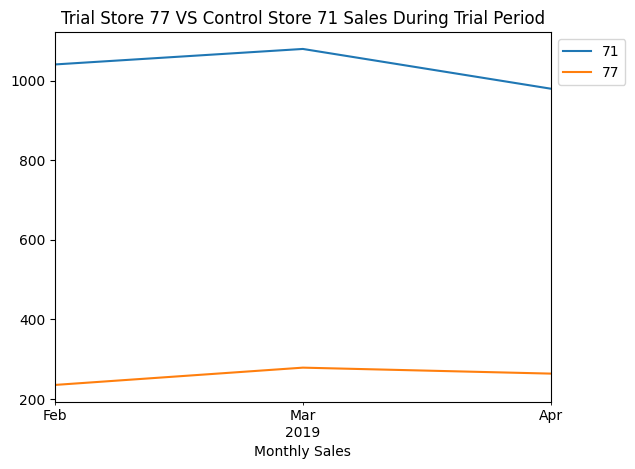

STORE_NBR,71,77
MONTH,,
2019-02,1041.0,235.0
2019-03,1080.0,278.5
2019-04,980.0,263.5


In [15]:
visual_trial_sales(77, 71)

Trial store 77 and Control store 71 maintained same sales trend during the trial period. But control store 71 had a more downward sales trend towards the end of the trial.

#### During Trial: Compare Monthly Sales of 86 vs 155

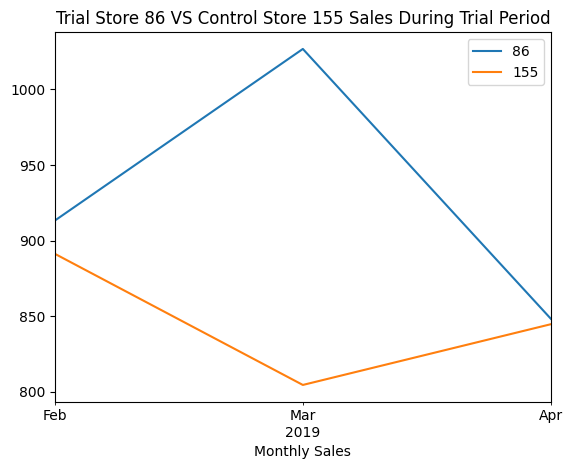

STORE_NBR,86,155
MONTH,,
2019-02,913.2,891.2
2019-03,1026.8,804.4
2019-04,848.2,844.6


In [16]:
visual_trial_sales(86, 155)

Trial Store 86 had a significant peak sales in the middle of trial period while control store 155 suffered a decline at the same period. However, towards the end of the trial, trial store 86 began to suffer a decline while control store 155 had a little increment in sales.

#### Compare Monthly Sales of 88 vs 204

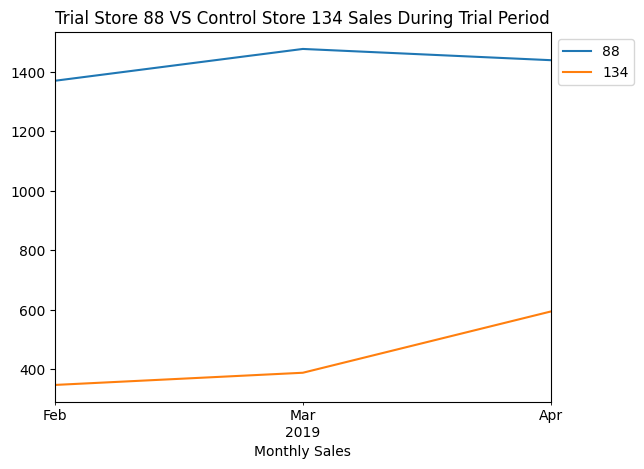

STORE_NBR,88,134
MONTH,,
2019-02,1370.2,347.6
2019-03,1477.2,388.6
2019-04,1439.4,594.6


In [34]:
visual_trial_sales(88, 134)

In [ ]:
Trial store 88 and Control store 134 maintained almost the same sales pattern during the trial period, however, towards the end of the trial period, control store 134 had an upward sales trend

### Trial Period: Comparing Total No of Customers for Trial and Control Stores

In [28]:
# create a function to visualize total customers during trial for each month
def visual_trial_customers(t_store, c_store):
    during_trial = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date) & df['STORE_NBR'].isin([c_store, t_store])]
    during_trial = during_trial.groupby(['STORE_NBR', 'MONTH'])['LYLTY_CARD_NBR'].nunique().reset_index()
    # visualize sales during trial period
    trial_pivot = during_trial.pivot(index='MONTH', columns ='STORE_NBR', values = 'LYLTY_CARD_NBR')
    trial_pivot.plot(kind = 'bar', color = ['red', 'green'])
    plt.legend(bbox_to_anchor=(1,1))
    plt.title(f'Total Customers of Trial Store {t_store} VS Control Store {c_store} During Trial Period')
    plt.ylabel('Total No of Customers')
    plt.xticks(rotation = 360)
    plt.show()
    return trial_pivot

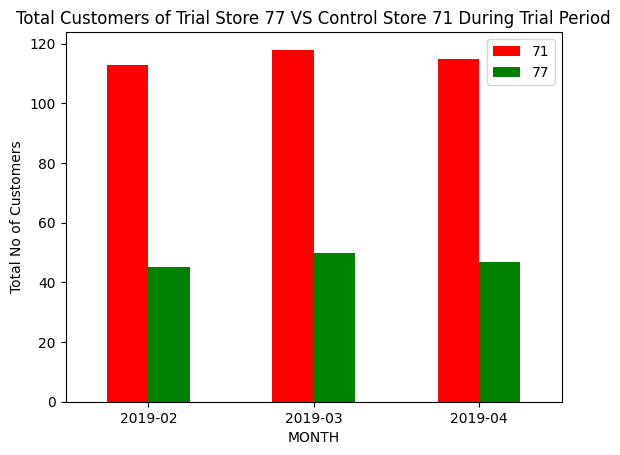

STORE_NBR,71,77
MONTH,,
2019-02,113,45
2019-03,118,50
2019-04,115,47


In [29]:
visual_trial_customers(77, 71)

Control store 71 and trial store 77 had a similar pattern in the total no of customers

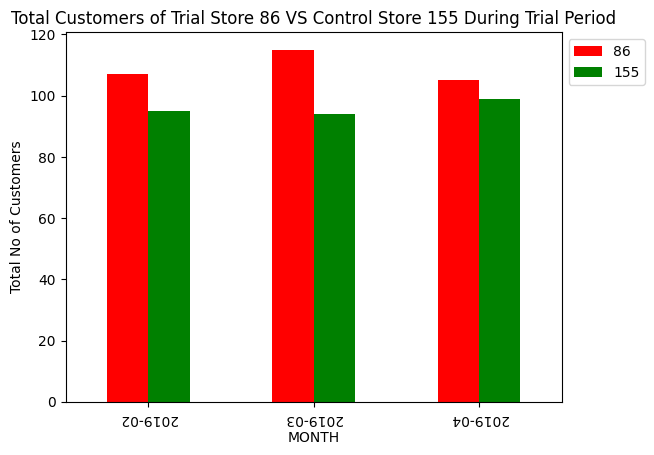

STORE_NBR,86,155
MONTH,,
2019-02,107,95
2019-03,115,94
2019-04,105,99


In [20]:
visual_trial_customers(86, 155)

Trial Store 86 had a significant increase in total no of customers during the trial period  while control store 155 had a little increase in total no of customers towards the end of the trial period.

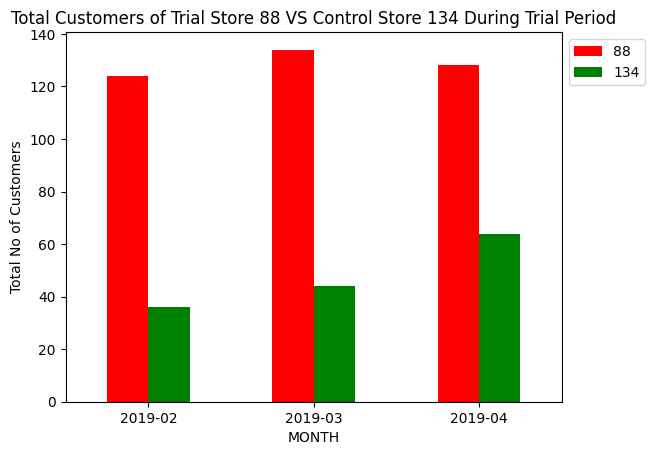

STORE_NBR,88,134
MONTH,,
2019-02,124,36
2019-03,134,44
2019-04,128,64


In [35]:
visual_trial_customers(88, 134)

Trial Store 88 had no significant increase in total no of customers while Control Store 134 had a progressing increase in total no of customers during the trial period.

### Trial Period: Comparing Average No of Transactions Per Customers for Trial and Control Stores

In [22]:
# create a function to visualize average transactions per customer during trial period
def visual_trial_txn_per_cust(t_store, c_store):
    during_trial = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    during_trial = during_trial.groupby(['STORE_NBR', 'MONTH']).agg(
        TOT_TXN = pd.NamedAgg(column = 'TXN_ID', aggfunc = 'count'),
        TOT_LYLTY_NBR = pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc = 'nunique')
    ).reset_index()
    during_trial['AVG_TXN_PER_CUST'] = round(during_trial['TOT_TXN']/during_trial['TOT_LYLTY_NBR'], 2)
    # visualize average transactions per customer during trial period
    during_trial = during_trial[during_trial['STORE_NBR'].isin([t_store, c_store])]
    trial_pivot = during_trial.pivot(index= 'MONTH', columns ='STORE_NBR', values = 'AVG_TXN_PER_CUST')
    trial_pivot.plot(color = ['red', 'green'])
    plt.legend(bbox_to_anchor=(1,1))
    plt.title(f'Trial Store {t_store} VS Control Store {c_store} Average No of Transaction Per Customers During Trial Period')
    plt.show()
    return trial_pivot

#### During Trial: Compare Average Transactions Per Customer Sales of 77 vs 71

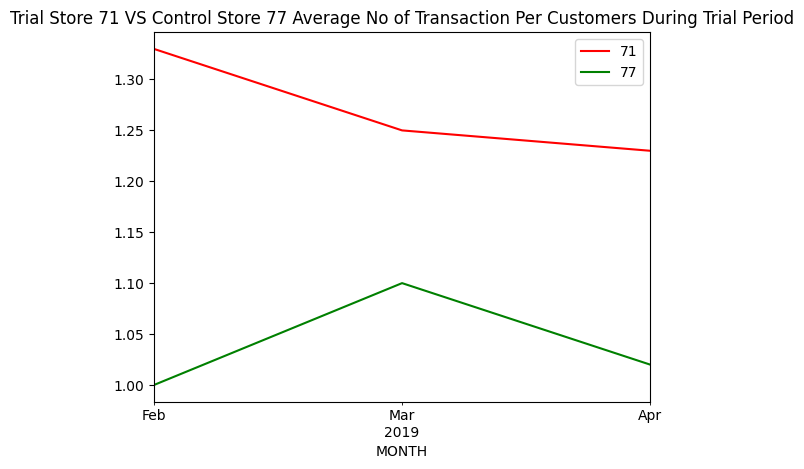

STORE_NBR,71,77
MONTH,,
2019-02,1.33,1.00
2019-03,1.25,1.10
2019-04,1.23,1.02


In [23]:
visual_trial_txn_per_cust(71, 77)

Trial Store 77 had an increase in transactions per customer during the trial period while Control store 71 had a decline in average transactions per customer.

#### During Trial: Compare Average Transactions Per Customer Sales of 86 vs 155

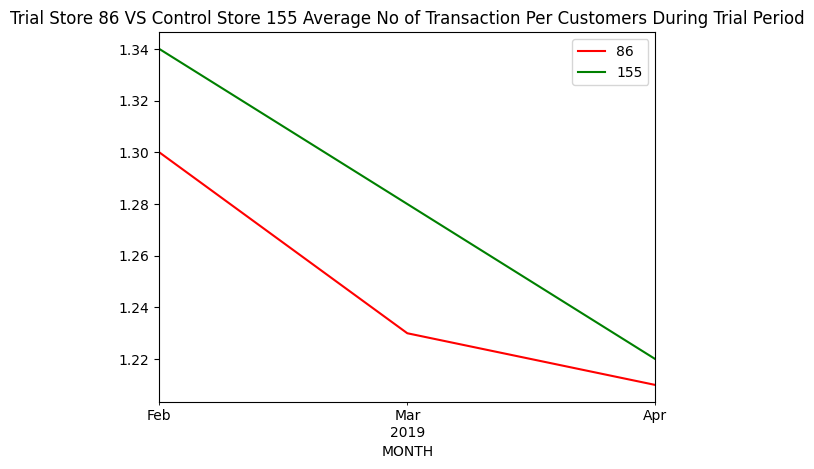

STORE_NBR,86,155
MONTH,,
2019-02,1.30,1.34
2019-03,1.23,1.28
2019-04,1.21,1.22


In [24]:
visual_trial_txn_per_cust(86, 155)

Trial store 86 and Control store 155 both had a decline in average transaction per customer during the trial period. However, 

#### During Trial: Compare Average Transactions Per Customer Sales of 88 vs 134

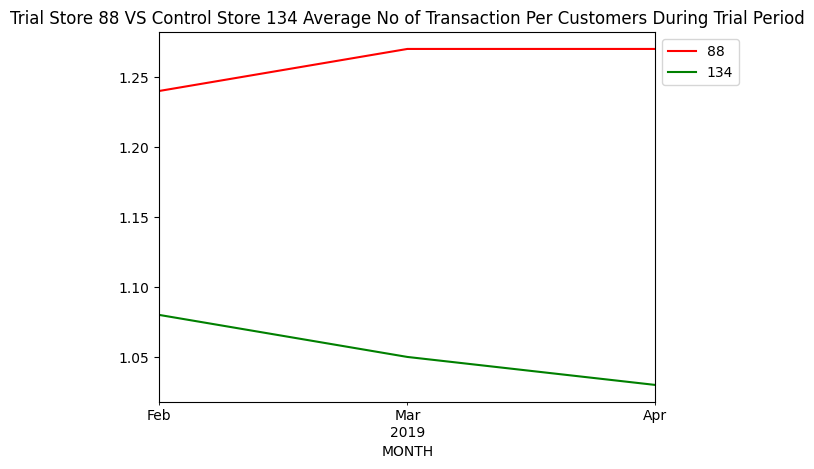

STORE_NBR,88,134
MONTH,,
2019-02,1.24,1.08
2019-03,1.27,1.05
2019-04,1.27,1.03


In [36]:
visual_trial_txn_per_cust(88, 134)

Trial store has an increase in average transactions per customer during the trial period while Trial store 134 had a progressive decline in average transactions per customer during the trial period.

### Conclusions